
# Text mining project

Youtube comment sentiment analysis project by Gustav Elmqvist (gusel725).

### Imports

In [17]:
import numpy as np
import pandas as pd
import spacy
import textblob
from textblob import TextBlob
from spacytextblob.spacytextblob import SpacyTextBlob

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

### Fetch dataset

In [18]:
df = pd.read_csv('IMDB_Dataset.csv', on_bad_lines='skip')

### Init nlp

In [34]:
nlp = spacy.load('en_core_web_lg')
nlp.add_pipe('spacytextblob')

In [20]:
Add preprocessor

def preprocess(text):
    return [token.lemma_ for token in nlp(text) if token.is_alpha and not token.is_stop]

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


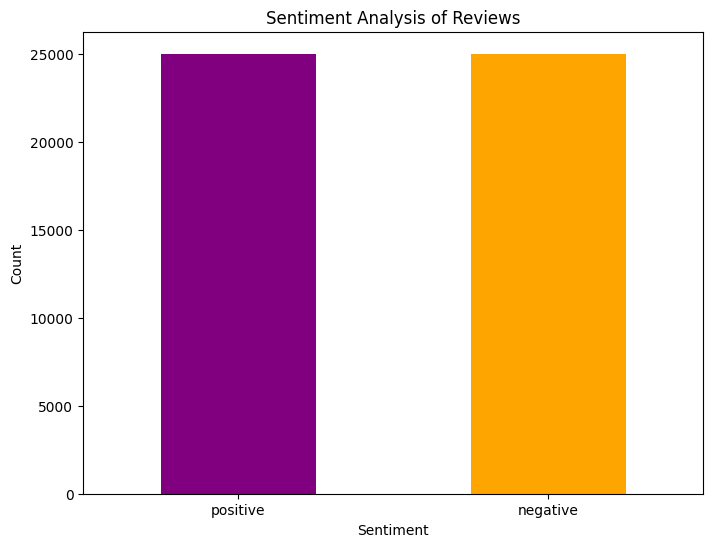

In [21]:
import matplotlib.pyplot as plt

# Get the value counts of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plotting the sentiment counts
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['purple', 'orange'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Create test and training data from the dataset

In [28]:
X, y = df['review'], df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Dummy classifier for baseline

In [29]:
# Use dummy classifier
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='uniform', random_state=42)
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

    negative       0.50      0.50      0.50      5000
    positive       0.50      0.50      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### Naive Bayes classifier

In [32]:

pipe = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=preprocess)),
    ('nb', MultinomialNB())
]).fit(X_train, y_train)

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.88      0.86      5000
    positive       0.87      0.82      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



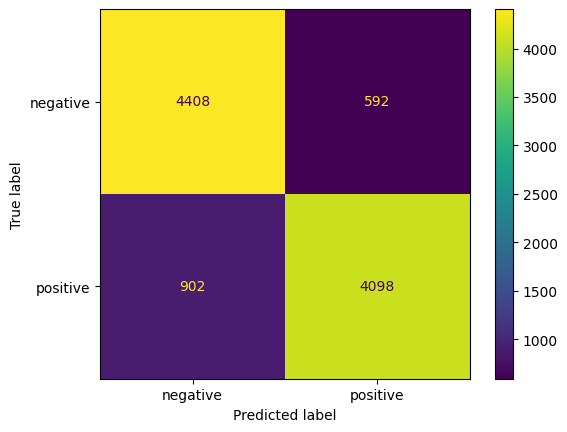

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])
plt.show()

### NLP spacytextblob

In [36]:
# Use nlp textblob sentiment analysis
def get_sentiment(text):
    doc = nlp(text)
    return doc._.polarity

y_pred = X_test.apply(get_sentiment)

# Convert sentiment to positive or negative
y_pred = y_pred.apply(lambda x: 'positive' if x > 0 else 'negative')

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

    negative       0.90      0.43      0.58      5000
    positive       0.63      0.95      0.75      5000

    accuracy                           0.69     10000
   macro avg       0.76      0.69      0.67     10000
weighted avg       0.76      0.69      0.67     10000

